In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
warnings.filterwarnings('ignore')


def display_all(candyData):
    with pd.option_context("display.max_rows",1000,"display.max_columns",1000):
        display(candyData)

In [2]:
candyData = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv", index_col=0)
candyData.head(5)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
candyData.shape

(85, 12)

In [4]:
candyData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 100 Grand to Whoppers
Data columns (total 12 columns):
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9)
memory usage: 8.6+ KB


In [5]:
profile=pandas_profiling.ProfileReport(candyData)
profile.to_file("candy_data_preprofiling.html")

In [6]:
candyData.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [7]:
display_all(candyData.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


In [8]:
with pd.option_context("display.max_rows",10):
   print(pd.get_option("display.max_rows"))
#print(pd.get_option("display.max_rows"))

10


In [9]:
#candyData.describe(include=[object])

In [10]:
candyData.sugarpercent = round(candyData.sugarpercent,3)
candyData.pricepercent = round(candyData.pricepercent,3)
candyData.winpercent = round(candyData.winpercent)

In [11]:
candyData.winpercent.quantile(.6)

53.8

In [12]:
winners = candyData[candyData.winpercent>candyData.winpercent.quantile(.6)]
print(type(winners))

<class 'pandas.core.frame.DataFrame'>


In [13]:
##Univariate Analysis

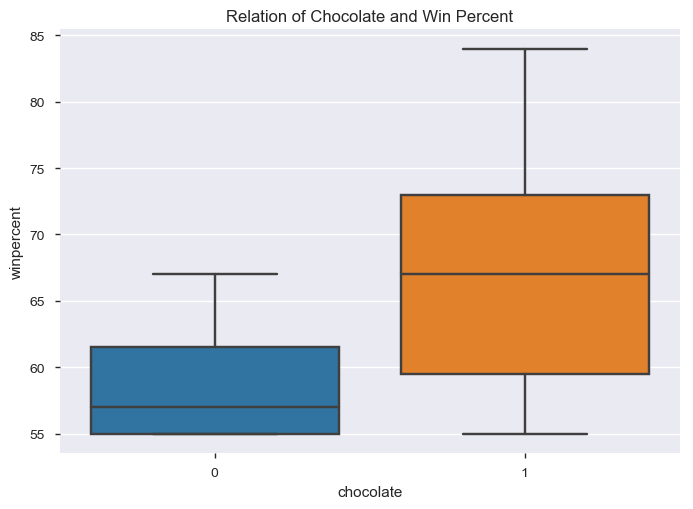

In [14]:
sns.boxplot(x="chocolate", y="winpercent", data=winners).set_title('Relation of Chocolate and Win Percent');

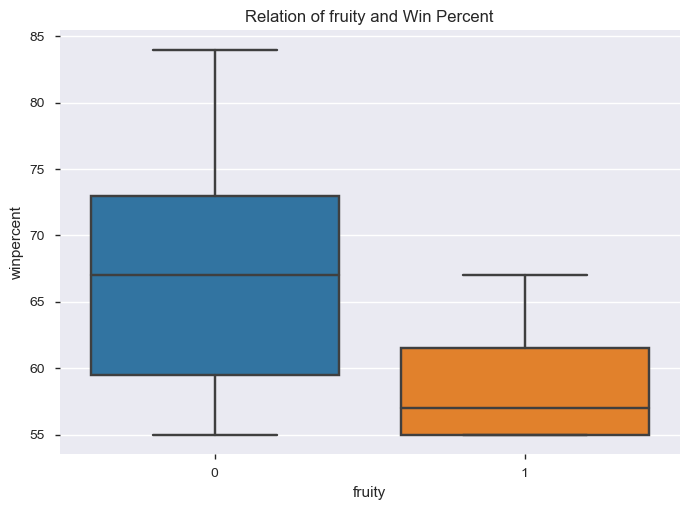

In [15]:
sns.boxplot(x="fruity", y="winpercent", data=winners).set_title('Relation of fruity and Win Percent');

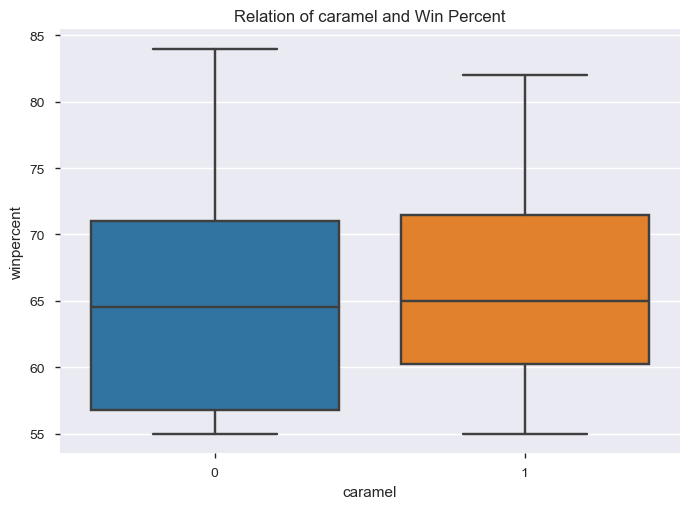

In [16]:
sns.boxplot(x="caramel", y="winpercent", data=winners).set_title('Relation of caramel and Win Percent');

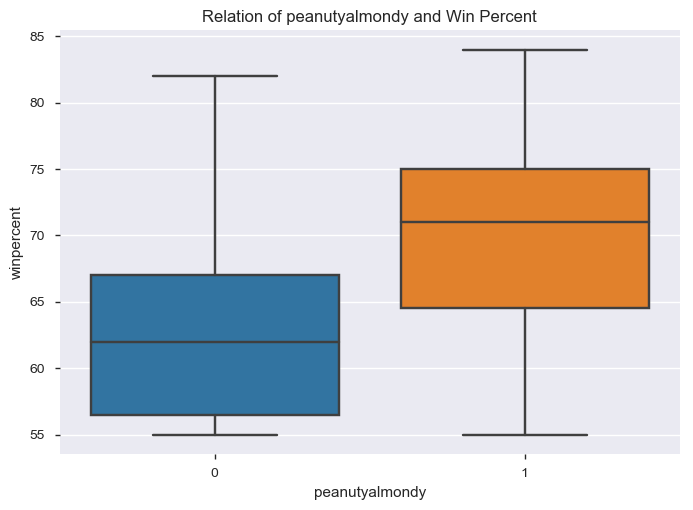

In [17]:
sns.boxplot(x="peanutyalmondy", y="winpercent", data=winners).set_title('Relation of peanutyalmondy and Win Percent');

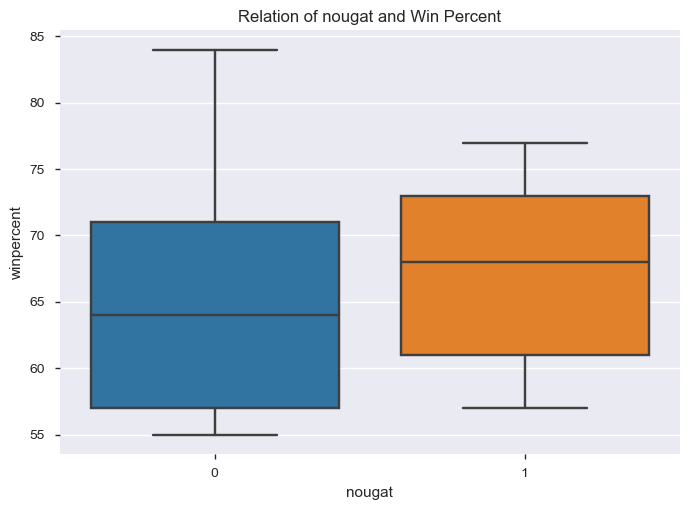

In [18]:
sns.boxplot(x="nougat", y="winpercent", data=winners).set_title('Relation of nougat and Win Percent');

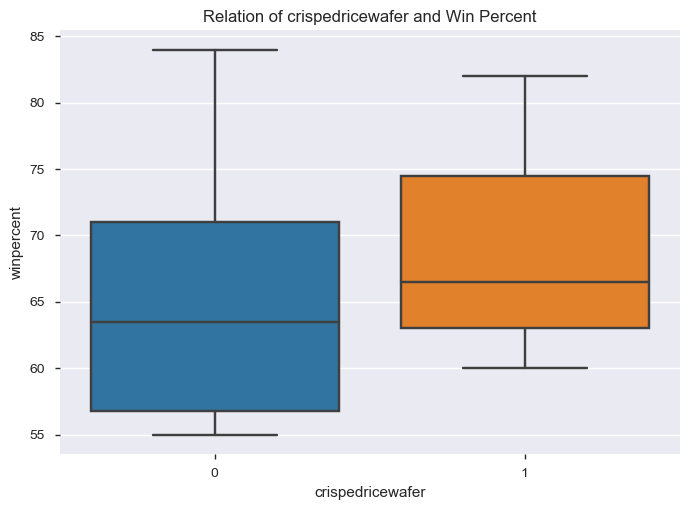

In [19]:
sns.boxplot(x="crispedricewafer", y="winpercent", data=winners).set_title('Relation of crispedricewafer and Win Percent');

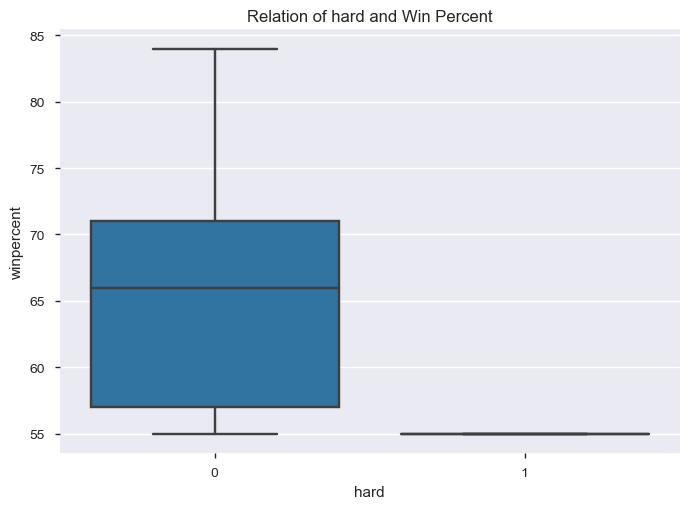

In [20]:
sns.boxplot(x="hard", y="winpercent", data=winners).set_title('Relation of hard and Win Percent');

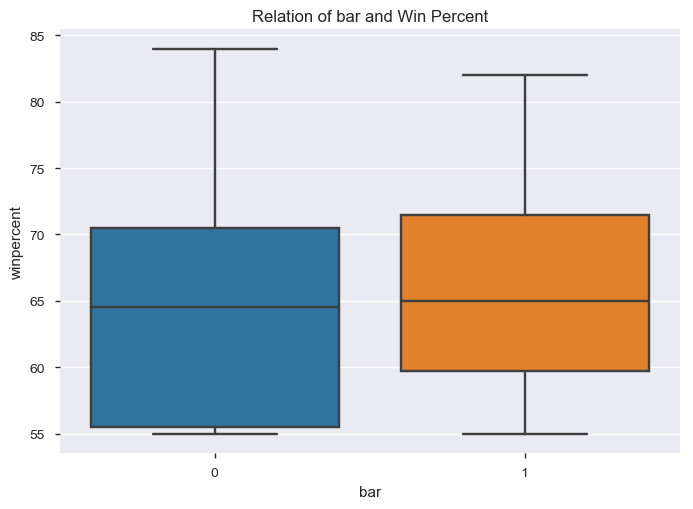

In [21]:
sns.boxplot(x="bar", y="winpercent", data=winners).set_title('Relation of bar and Win Percent');

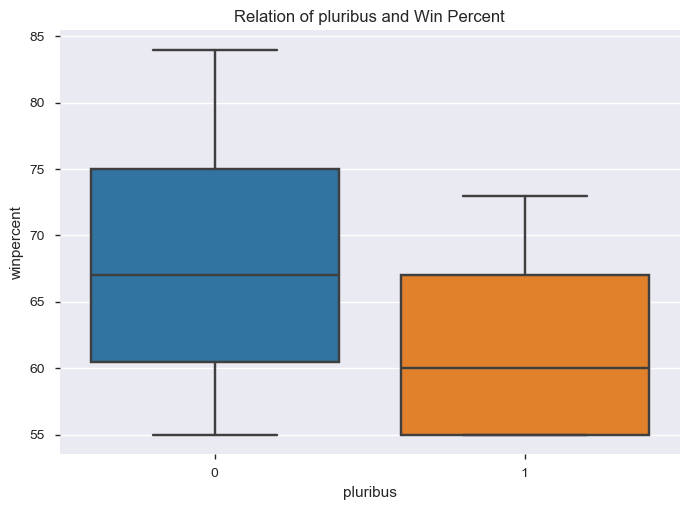

In [22]:
sns.boxplot(x="pluribus", y="winpercent", data=winners).set_title('Relation of pluribus and Win Percent');

In [23]:
#winners.hard.value_counts()

In [24]:
#candyData[['hard','winpercent']]

In [25]:

#So all the columns presence are important to us hence keeping all the columns for the analysis

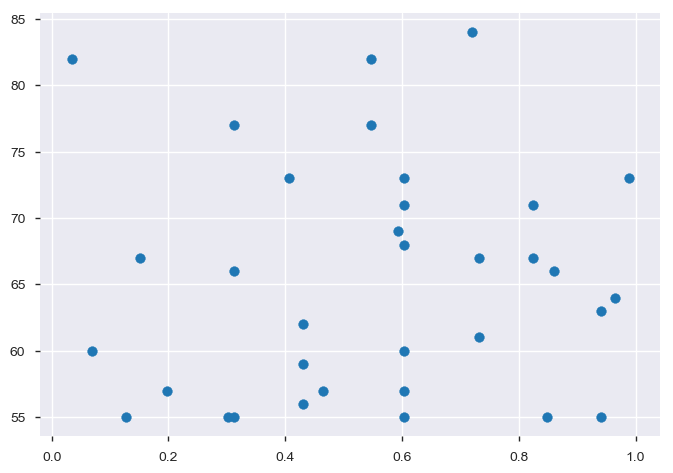

In [26]:
plt.scatter(winners["sugarpercent"],winners["winpercent"])

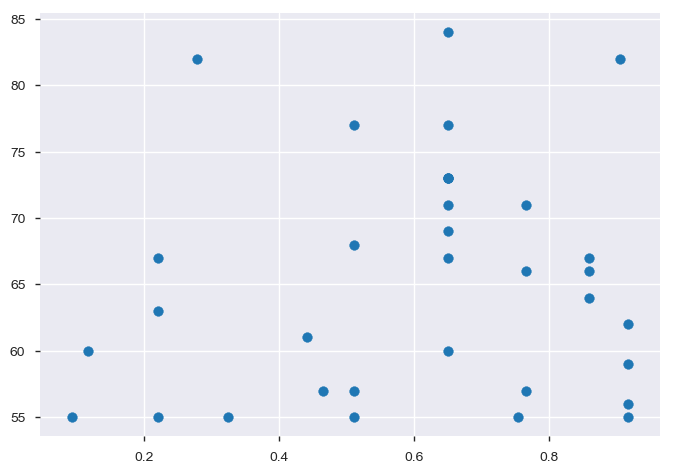

In [27]:
plt.scatter(winners["pricepercent"],winners["winpercent"])

In [28]:
#There seems to be no proper correlation between the price percent and sugar percent and win percent

In [29]:
#Most Popular and Least Popular Candies

In [30]:
candyData.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,67.0
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,68.0
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.0


In [31]:
candyData.columns

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [32]:
candyData.columns[1:]

Index(['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer',
       'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent',
       'winpercent'],
      dtype='object')

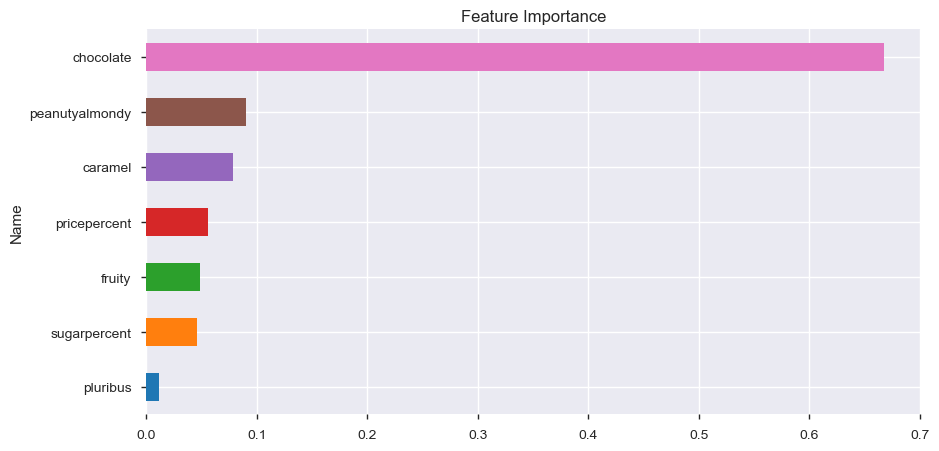

In [33]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=3).fit(candyData[candyData.columns[0:-1]],candyData[candyData.columns[-1]])
imp = pd.DataFrame.from_dict({'Name':candyData.columns[0:-1],'Importance':reg.feature_importances_})
imp_plt = imp.sort_values(by='Importance',ascending=True).reset_index(drop=True)
imp_plt[imp_plt.Importance>0].plot(kind='barh',x='Name',y='Importance',title='Feature Importance',sort_columns=True,figsize = (10,5),legend=False)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test = train_test_split(candyData[candyData.columns[1:-1]],candyData[candyData.columns[-1]],test_size=0.33,random_state=42)
rmse_err=[]

In [35]:
rmse_err

[]

In [36]:
#Model Training

In [37]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,reg.predict(X_test))))
rmse_err[-1]

[13.674622973100117]

In [40]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,rf_reg.predict(X_test))))
rmse_err[-1]

11.892940544621112

In [41]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression().fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,lr_reg.predict(X_test))))
rmse_err[-1]

13.001800492133189

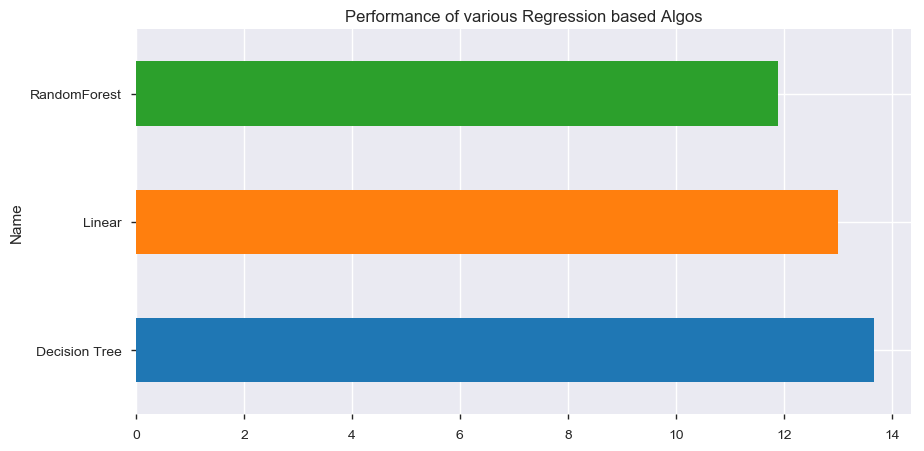

In [43]:
models = ['Decision Tree','RandomForest','Linear']
pd.DataFrame.from_dict({'Name':models,'RMSE':rmse_err}).sort_values(by='RMSE',ascending=False).plot(x='Name',y='RMSE',kind='barh'
,sort_columns=True,figsize=(10,5),legend=False,title = 'Performance of various Regression based Algos')                                                                                        